# Fisher Linear Discriminant

In this exercise, we apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates two data matrices corresponding to: *infant (I)*, *non-infant (N)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots the projection on the first dimension of the data representing the length of the abalone.

(1342, 7) (2835, 7)


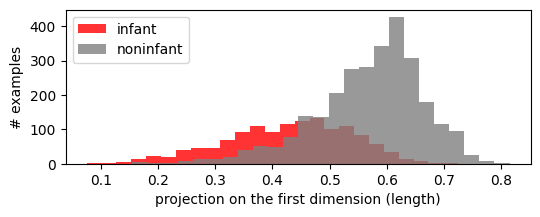

In [34]:
%matplotlib inline
import utils,numpy
from matplotlib import pyplot as plt

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.I.shape, abalone.N.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension (length)')

## Implementation (10 + 5 + 5 = 20 P)

* **Create a function `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a function `objective(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a function `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [35]:
def fisher(X1,X2):
    ##### Replace by your code
    mean1 = numpy.mean(X1, axis=0)
    mean2 = numpy.mean(X2, axis=0)
    mean_diff = mean1 - mean2

    # Here I get the term " * (X1.shape[0] - 1)" from Nico, but I don't get that.
    # Since in the slides I can find any clue about this scaling vector. 
    # But after adding this term the results seem to be identical to the given ones.
    cov1 = numpy.cov(X1, rowvar=False, bias = True) * (X1.shape[0] - 1)
    cov2 = numpy.cov(X2, rowvar=False, bias = True) * (X2.shape[0] - 1)
    S_w = cov1 + cov2

    S_w_inv = numpy.linalg.inv(S_w)
    
    return S_w_inv@mean_diff
    #####
    
def objective(X1,X2,w):
    ##### Replace by your code
    mean1 = numpy.mean(X1, axis=0)
    mean2 = numpy.mean(X2, axis=0)
    mean_diff = mean1 - mean2
    
    S_B = numpy.outer(mean_diff, mean_diff)

    cov1 = numpy.cov(X1, rowvar=False)
    cov2 = numpy.cov(X2, rowvar=False)
    S_w = cov1 + cov2

    max_mean_class_diff = w.T @ S_B @ w
    min_inclass_var = w.T @ S_w @ w

    return (max_mean_class_diff / min_inclass_var)
    #####
    
def expand(X):
    # Get the number of samples (n) and dimensionality (d) of the input data
    n, d = X.shape
    
    # Calculate the number of quadratic terms: (d*(d+3))/2
    expanded_dim = (d * (d + 3)) // 2
    
    # Initialize an empty array to hold the expanded dataset
    Z = numpy.zeros((n, expanded_dim))
    
    # Iterate through each data point
    for i, x in enumerate(X):
        # Copy the original vector
        z = list(x)
        
        # Append all pairwise products (including squares) to the expansion
        for j in range(d):
            for k in range(j, d):
                z.append(x[j] * x[k])
        
        # Assign the expanded vector to the result array
        Z[i] = z
    
    return Z

def my_plot(Z1, Z2, w,name):
        plt.figure(figsize=(6,2))
        plt.xlabel(name)
        plt.ylabel('# examples')
        plt.hist(numpy.dot(Z1,w),bins=25, alpha=0.8,color='red',label='infant')
        plt.hist(numpy.dot(Z2,w),bins=25, alpha=0.8,color='gray',label='noninfant')
        plt.legend()
        plt.show()

## Analysis (5 + 5 = 10 P)

* **Print value of the objective function and the histogram for several values of `w`:**

  * `w` is a canonical coordinate vector for the first feature (length).
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).

First dimension:
0.9561309651328882


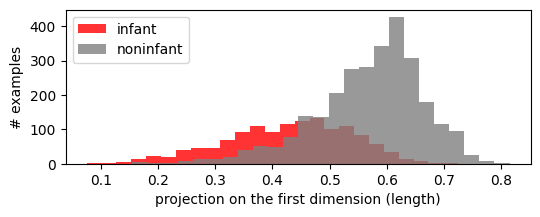

Difference:
1.1883374608649933


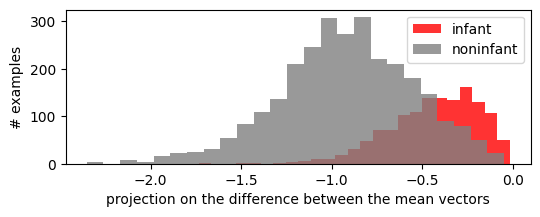

Fisher linear discriminant:
1.247805111133804


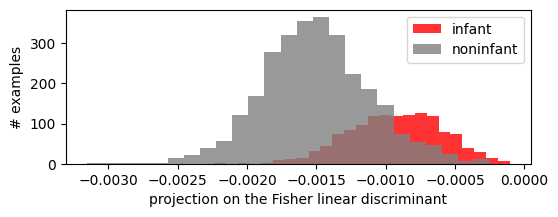

(1342, 35)
(2835, 35)
First dimension:
1.6163985551956817


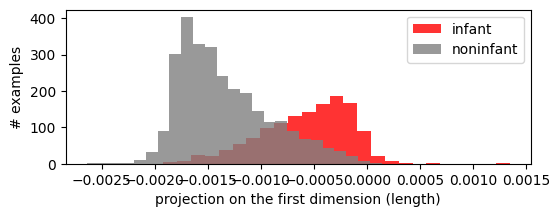

In [36]:
##### REPLACE BY YOUR CODE
%matplotlib inline

w1 = numpy.array([1,0,0,0,0,0,0])
print('First dimension:')
print(objective(abalone.I,abalone.N,w1))
abalone.plot(w1,'projection on the first dimension (length)')

mean1 = numpy.mean(abalone.I, axis=0)
mean2 = numpy.mean(abalone.N, axis=0)
mean_diff = mean1 - mean2
w2 = mean_diff
print('Difference:')
print(objective(abalone.I,abalone.N,w2))
abalone.plot(w2,'projection on the difference between the mean vectors')

w3 = fisher(abalone.I,abalone.N)
print('Fisher linear discriminant:')
print(objective(abalone.I,abalone.N,w3))
abalone.plot(w3,'projection on the Fisher linear discriminant')


Z1 = expand(abalone.I)
Z2 = expand(abalone.N)
print(Z1.shape)
print(Z2.shape)
w4 = fisher(Z1, Z2)
print('First dimension:')
print(objective(Z1, Z2, w4))
my_plot(Z1, Z2, w4,'projection on the first dimension (length)')
#####